In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA

C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
THE_PREPROCESSED_ONE = pd.read_pickle('THE_PREPROCESSED_ONE')
THE_PREPROCESSED_ONE.describe()

,RGB-CH1-1,RGB-CH1-2,RGB-CH1-3,RGB-CH1-4,RGB-CH1-5,RGB-CH1-6,RGB-CH1-7,RGB-CH1-8,RGB-CH1-9,RGB-CH1-10,...,Cluster: 4 cspace: YDBDR; sortY; CH3,Cluster: 4 cspace: YDBDR; sortY; X,Cluster: 4 cspace: YDBDR; sortY; Y,Cluster: 4 cspace: YDBDR; sortY; SIZE,Cluster: 4 cspace: YDBDR; sortSize; CH1,Cluster: 4 cspace: YDBDR; sortSize; CH2,Cluster: 4 cspace: YDBDR; sortSize; CH3,Cluster: 4 cspace: YDBDR; sortSize; X,Cluster: 4 cspace: YDBDR; sortSize; Y,Cluster: 4 cspace: YDBDR; sortSize; SIZE
count,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,...,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000
mean,13.693646,1.554160,5.008719,13.900079,18.873593,16.886902,15.702777,13.799538,11.661687,10.331902,...,0.206636,0.639936,0.399902,0.249972,0.263748,-0.311628,0.194547,0.642023,0.419903,0.450141
std,33.234796,4.535924,12.067901,21.448056,23.728016,21.399593,18.492369,15.680394,14.018714,11.966379,...,0.105696,0.357012,0.258419,0.074756,0.036176,0.043663,0.102576,0.298794,0.209543,0.127510
min,0.004732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.058196,0.037267,0.027798,0.035343,0.106139,-0.469873,0.059177,0.118830,0.077089,0.216626
25%,0.179210,0.092328,0.299798,1.397400,3.612839,3.599473,3.470477,3.294013,2.880329,2.686711,...,0.152232,0.341772,0.227908,0.204848,0.249347,-0.319551,0.152203,0.414217,0.280664,0.353939
50%,1.508963,0.444945,1.397099,5.741292,10.005606,8.871567,8.501765,7.727641,6.742055,5.990359,...,0.160250,0.598244,0.335498,0.254242,0.260690,-0.309709,0.160415,0.607170,0.370691,0.422424
75%,10.761653,1.350711,4.291736,16.970629,25.224261,21.544168,21.989697,19.426719,14.734009,13.437034,...,0.176132,0.879454,0.505453,0.300000,0.264346,-0.290400,0.166022,0.810644,0.504169,0.520950
max,597.307272,99.234156,199.245486,207.967745,205.520518,215.742929,219.116115,161.336920,188.565772,98.708031,...,0.540243,2.400206,2.321429,0.449394,0.397992,-0.131230,0.539137,2.016043,2.009935,0.900208


In [4]:
rawDF = pd.read_pickle('rawDF2')
rawDF.describe()

,FullSize2D,Height,Width,Ratio
count,7912.000000,7912.000000,7912.000000,7912.000000
mean,26860.005182,140.309024,185.396234,1.451152
std,11185.869963,44.964427,41.084657,0.274865
min,304.000000,16.000000,19.000000,1.000000
25%,22400.000000,112.000000,200.000000,1.333333
50%,30000.000000,150.000000,200.000000,1.333333
75%,30000.000000,150.000000,200.000000,1.747573
max,139502.000000,373.000000,374.000000,3.014286


In [5]:
X = THE_PREPROCESSED_ONE
y = rawDF['ProdName']

In [4]:
X = THE_PREPROCESSED_ONE
y = rawDF['ProdName']
yc = pd.Categorical(y)
y = yc.codes
y

array([ 0,  6,  6, ..., 35, 35, 35], dtype=int8)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 666)#because hail satan
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("======================")
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X train shape:  (6329, 4392)
y train shape:  (6329,)
X test shape:  (1583, 4392)
y test shape:  (1583,)


### Correlation matrix of dataset:

In [6]:
inputDS = X_train
inputDS['ProdName'] = y_train

C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
inputDS['ProdName'] = pd.Categorical(inputDS['ProdName'], ordered = True)
inputDS['ProdNameCode'] = inputDS['ProdName'].cat.codes
#target_cat

C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
inputDS['ProdNameCode']

5829     6
3265    12
2174    34
4746     5
7083    17
6405    10
4622    24
1259    23
924     15
2820     0
3980    19
387     18
2719     0
5274    32
7214    11
1760    24
7262    11
6673     1
186      9
3991    20
923     15
2015     0
3016     4
26       6
2631     0
3177     7
4648    27
3979    19
2050    29
6734    31
        ..
6292    37
4120    20
1163     1
2324    34
885     15
2189    34
4047    20
204      9
3141     6
807     13
4584    24
3118     6
2448    36
575     13
2785     0
2830     0
2204    34
5180    32
563     13
222      9
1115     3
1469    23
2462    36
1993    26
70       6
2878     0
1950    26
7597     2
1922    26
6380    10
Name: ProdNameCode, Length: 6329, dtype: int8

In [9]:
inputDS.head()

,RGB-CH1-1,RGB-CH1-2,RGB-CH1-3,RGB-CH1-4,RGB-CH1-5,RGB-CH1-6,RGB-CH1-7,RGB-CH1-8,RGB-CH1-9,RGB-CH1-10,...,Cluster: 4 cspace: YDBDR; sortY; Y,Cluster: 4 cspace: YDBDR; sortY; SIZE,Cluster: 4 cspace: YDBDR; sortSize; CH1,Cluster: 4 cspace: YDBDR; sortSize; CH2,Cluster: 4 cspace: YDBDR; sortSize; CH3,Cluster: 4 cspace: YDBDR; sortSize; X,Cluster: 4 cspace: YDBDR; sortSize; Y,Cluster: 4 cspace: YDBDR; sortSize; SIZE,ProdName,ProdNameCode
5829,2.819305,0.020430,0.796760,0.858049,2.226842,1.654809,2.880594,3.697784,15.833052,25.884486,...,0.284775,0.203931,0.262987,-0.318657,0.161833,0.967257,0.275044,0.377559,6,6
3265,3.041214,18.688956,31.459533,38.589351,17.199897,7.584107,4.303129,2.877165,3.205263,2.031683,...,0.271441,0.196364,0.256073,-0.301116,0.162906,1.067550,0.320088,0.315455,12,12
2174,0.449906,5.788786,83.637458,122.179375,22.285326,5.968748,2.879396,1.694645,1.364714,0.749843,...,0.266372,0.256757,0.297900,-0.355199,0.405743,1.121581,0.324740,0.274365,34,34
4746,0.232645,0.286333,2.666475,7.050947,18.289512,51.915728,65.963934,34.968402,14.388227,9.896380,...,0.069466,0.188370,0.263658,-0.319932,0.157571,0.922796,0.362694,0.493857,5,5
7083,11.190287,0.560789,2.803944,11.215777,8.182419,6.092206,2.090213,3.339243,5.149061,2.854925,...,0.123211,0.070686,0.259087,-0.299148,0.167341,0.440765,0.536763,0.803188,17,17


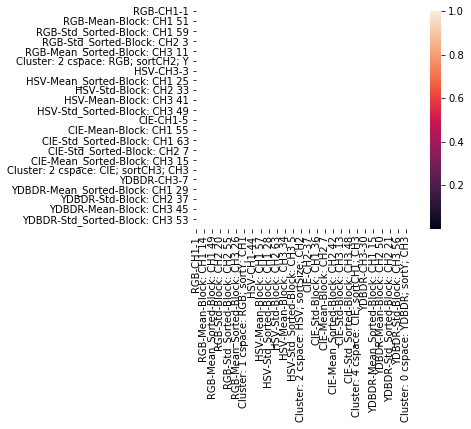

In [10]:
#correlation matrix
Datacorr = inputDS.corr()
f, ax = plt.subplots(1,1)
sns.heatmap((np.abs(Datacorr)), vmax=1, square=True);

In [11]:
Datacorr

,RGB-CH1-1,RGB-CH1-2,RGB-CH1-3,RGB-CH1-4,RGB-CH1-5,RGB-CH1-6,RGB-CH1-7,RGB-CH1-8,RGB-CH1-9,RGB-CH1-10,...,Cluster: 4 cspace: YDBDR; sortY; X,Cluster: 4 cspace: YDBDR; sortY; Y,Cluster: 4 cspace: YDBDR; sortY; SIZE,Cluster: 4 cspace: YDBDR; sortSize; CH1,Cluster: 4 cspace: YDBDR; sortSize; CH2,Cluster: 4 cspace: YDBDR; sortSize; CH3,Cluster: 4 cspace: YDBDR; sortSize; X,Cluster: 4 cspace: YDBDR; sortSize; Y,Cluster: 4 cspace: YDBDR; sortSize; SIZE,ProdNameCode
RGB-CH1-1,1.000000,-0.003862,-0.035593,-0.061638,-0.079756,-0.115359,-0.150700,-0.127397,-0.129413,-0.109054,...,-0.021505,0.115778,-0.118850,-0.306901,0.308836,-0.010076,-0.008333,0.118695,0.055138,-0.137451
RGB-CH1-2,-0.003862,1.000000,0.550728,0.228532,0.054479,0.019157,0.009261,-0.008504,-0.026484,-0.043654,...,0.039865,-0.023824,-0.037651,0.041693,-0.040794,0.045096,-0.000405,-0.038549,-0.057546,0.044403
RGB-CH1-3,-0.035593,0.550728,1.000000,0.521871,0.123285,0.046559,-0.034417,-0.004469,-0.001305,-0.027161,...,0.026790,0.002373,-0.037279,0.068716,-0.083430,0.057729,0.037455,-0.033140,-0.091889,0.058565
RGB-CH1-4,-0.061638,0.228532,0.521871,1.000000,0.491511,0.186309,0.058791,0.038938,-0.003686,-0.042719,...,0.055217,-0.004700,-0.006878,0.067037,-0.094499,0.057469,0.041297,-0.029409,-0.184710,0.078264
RGB-CH1-5,-0.079756,0.054479,0.123285,0.491511,1.000000,0.556133,0.327206,0.193928,0.088713,0.046895,...,0.050371,0.005199,-0.007445,0.072235,-0.114074,0.049335,0.022991,-0.025420,-0.168028,0.052618
RGB-CH1-6,-0.115359,0.019157,0.046559,0.186309,0.556133,1.000000,0.635137,0.429589,0.267393,0.173433,...,0.050753,-0.009366,0.011728,0.085204,-0.134440,0.030993,0.060771,-0.058940,-0.119464,0.015594
RGB-CH1-7,-0.150700,0.009261,-0.034417,0.058791,0.327206,0.635137,1.000000,0.698625,0.422961,0.319354,...,0.047928,-0.028139,0.020628,0.055510,-0.102993,-0.015039,0.046644,-0.060829,-0.090384,0.000583
RGB-CH1-8,-0.127397,-0.008504,-0.004469,0.038938,0.193928,0.429589,0.698625,1.000000,0.642759,0.483369,...,0.042163,-0.043105,0.026837,0.147310,-0.195130,0.086454,0.099877,-0.085997,-0.067693,0.013177
RGB-CH1-9,-0.129413,-0.026484,-0.001305,-0.003686,0.088713,0.267393,0.422961,0.642759,1.000000,0.767549,...,0.053935,-0.037171,0.026034,0.124805,-0.168131,0.062775,0.108611,-0.078863,-0.029752,-0.026741
RGB-CH1-10,-0.109054,-0.043654,-0.027161,-0.042719,0.046895,0.173433,0.319354,0.483369,0.767549,1.000000,...,0.080118,-0.044063,0.037691,0.106464,-0.148563,0.047543,0.117955,-0.088020,-0.027317,-0.032068


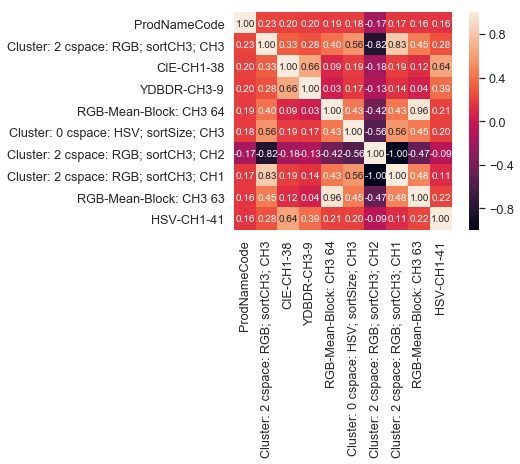

In [12]:
amount_of_features = 10
selected = (np.abs(Datacorr)).nlargest(amount_of_features, 'ProdNameCode')['ProdNameCode'].index
cm = (inputDS[selected]).corr()

sns.set(font_scale=1.15)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=selected.values, xticklabels=selected.values)
plt.show()

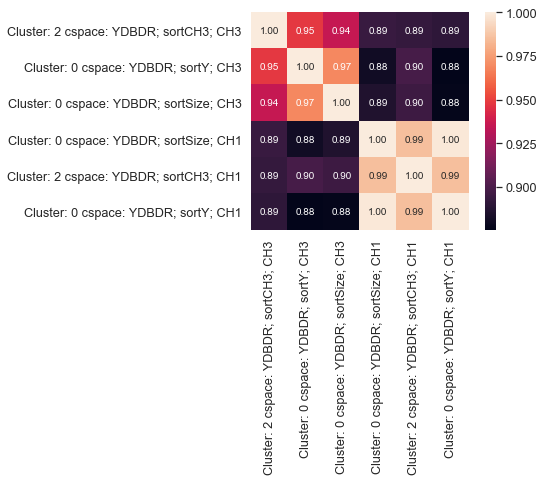

In [13]:
amount_of_features = 6
selectedyd = (np.abs(Datacorr)).nlargest(amount_of_features, 'Cluster: 2 cspace: YDBDR; sortCH3; CH3')['Cluster: 2 cspace: YDBDR; sortCH3; CH3'].index
cm = (inputDS[selectedyd]).corr()

sns.set(font_scale=1.15)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=selectedyd.values, xticklabels=selectedyd.values)
plt.show()

In [14]:
selected

Index(['ProdNameCode', 'Cluster: 2 cspace: RGB; sortCH3; CH3', 'CIE-CH1-38',
       'YDBDR-CH3-9', 'RGB-Mean-Block: CH3 64',
       'Cluster: 0 cspace: HSV; sortSize; CH3',
       'Cluster: 2 cspace: RGB; sortCH3; CH2',
       'Cluster: 2 cspace: RGB; sortCH3; CH1', 'RGB-Mean-Block: CH3 63',
       'HSV-CH1-41'],
      dtype='object')

C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


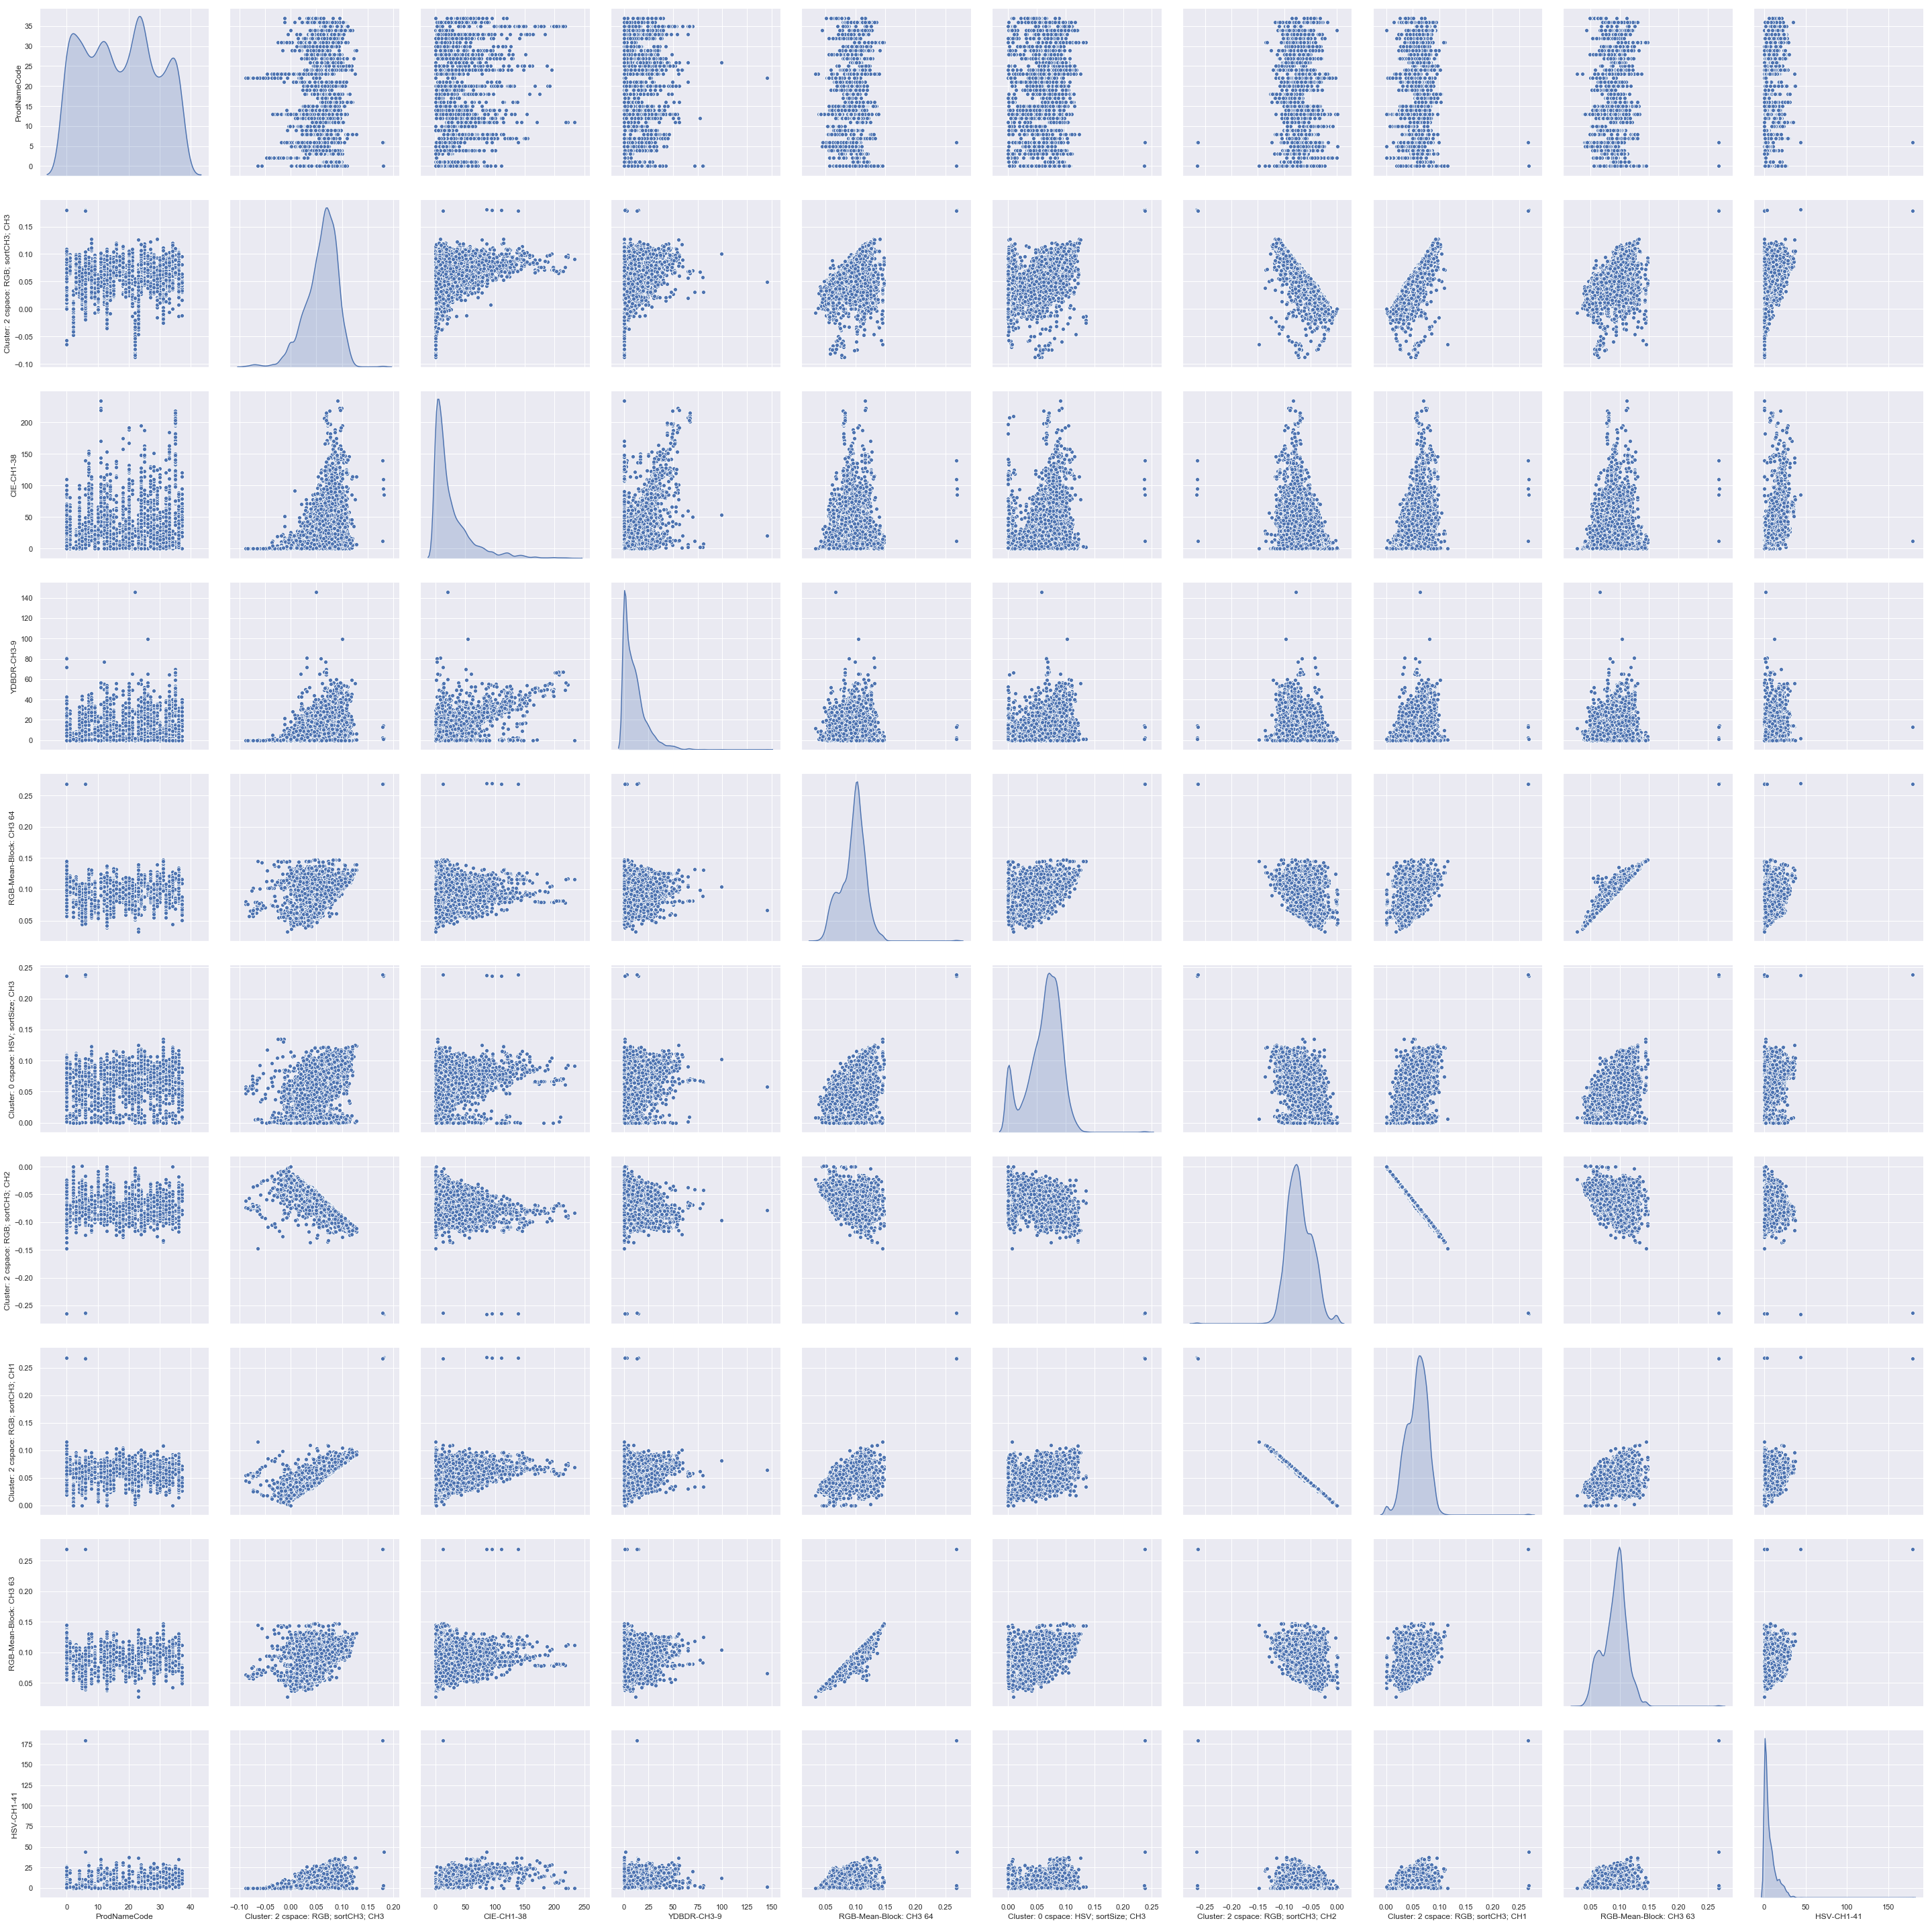

In [15]:
sns.set()
paircols = selected
sns.pairplot(inputDS[paircols], size = 4, diag_kind='kde')
plt.show()

C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


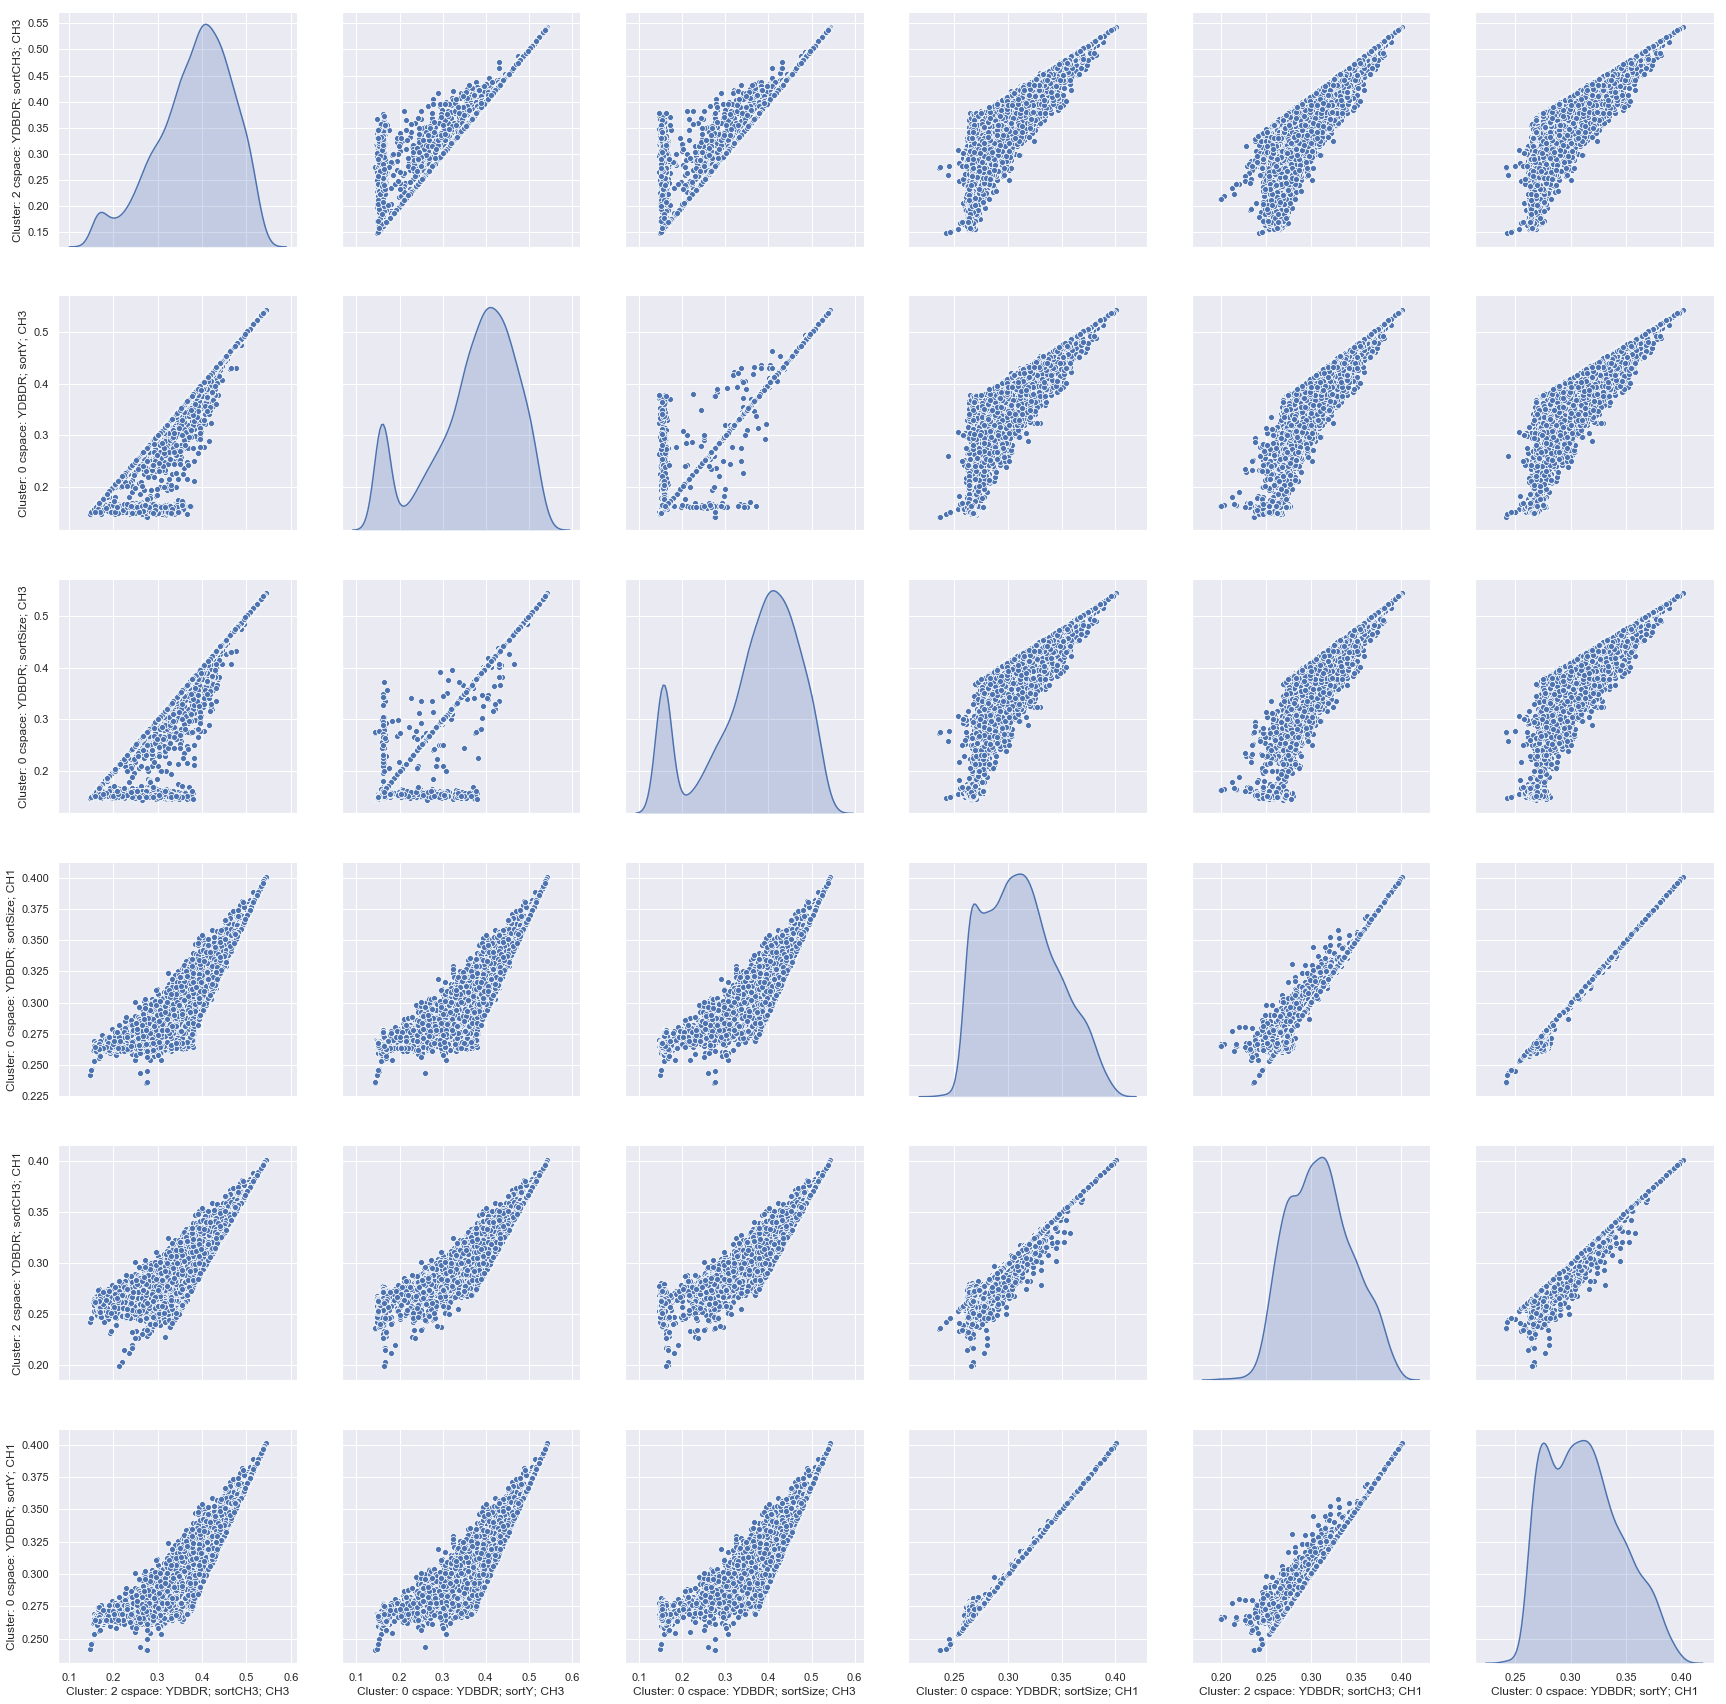

In [16]:
sns.set()
paircolsyd = selectedyd
sns.pairplot(inputDS[paircolsyd], size = 4, diag_kind='kde')
plt.show()

We can see, that covariance analysis and scatterplots won't give us much valuable information on features which most prominently influence food categories.
However, we can see, that a lot of variables related to gaussian mixture clusters are strongly correlated. This was expected. Porbably a lot of this variables will be merged together during dimensionality reduction.

### Features importances

In [6]:
X_train.head()

,RGB-CH1-1,RGB-CH1-2,RGB-CH1-3,RGB-CH1-4,RGB-CH1-5,RGB-CH1-6,RGB-CH1-7,RGB-CH1-8,RGB-CH1-9,RGB-CH1-10,...,Cluster: 4 cspace: YDBDR; sortY; CH3,Cluster: 4 cspace: YDBDR; sortY; X,Cluster: 4 cspace: YDBDR; sortY; Y,Cluster: 4 cspace: YDBDR; sortY; SIZE,Cluster: 4 cspace: YDBDR; sortSize; CH1,Cluster: 4 cspace: YDBDR; sortSize; CH2,Cluster: 4 cspace: YDBDR; sortSize; CH3,Cluster: 4 cspace: YDBDR; sortSize; X,Cluster: 4 cspace: YDBDR; sortSize; Y,Cluster: 4 cspace: YDBDR; sortSize; SIZE
5829,2.819305,0.020430,0.796760,0.858049,2.226842,1.654809,2.880594,3.697784,15.833052,25.884486,...,0.407996,1.582221,0.284775,0.203931,0.262987,-0.318657,0.161833,0.967257,0.275044,0.377559
3265,3.041214,18.688956,31.459533,38.589351,17.199897,7.584107,4.303129,2.877165,3.205263,2.031683,...,0.163910,0.176944,0.271441,0.196364,0.256073,-0.301116,0.162906,1.067550,0.320088,0.315455
2174,0.449906,5.788786,83.637458,122.179375,22.285326,5.968748,2.879396,1.694645,1.364714,0.749843,...,0.178491,0.955731,0.266372,0.256757,0.297900,-0.355199,0.405743,1.121581,0.324740,0.274365
4746,0.232645,0.286333,2.666475,7.050947,18.289512,51.915728,65.963934,34.968402,14.388227,9.896380,...,0.497821,1.149824,0.069466,0.188370,0.263658,-0.319932,0.157571,0.922796,0.362694,0.493857
7083,11.190287,0.560789,2.803944,11.215777,8.182419,6.092206,2.090213,3.339243,5.149061,2.854925,...,0.379175,0.816993,0.123211,0.070686,0.259087,-0.299148,0.167341,0.440765,0.536763,0.803188


In [7]:
treeclass = DecisionTreeClassifier()
treeclass.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
y_train_pred = treeclass.predict(X_train)
print(accuracy_score(y_train_pred,y_train))

1.0


In [9]:
treeclass.feature_importances_[treeclass.feature_importances_>0.005]

array([0.00567021, 0.01468948, 0.00657489, 0.01209784, 0.00559464,
       0.00713861, 0.00758501, 0.01342331, 0.01489386, 0.00671816,
       0.01103783, 0.00629966, 0.02535625, 0.01500657, 0.00668821,
       0.00823857, 0.00525879, 0.00948996, 0.00571188, 0.01309338,
       0.01403723, 0.01105397, 0.01773582, 0.011526  , 0.01291505,
       0.01759031, 0.00905355, 0.01180563, 0.00529336, 0.01100798,
       0.0050853 , 0.00598774, 0.008253  , 0.00688808, 0.01163043,
       0.00545311, 0.01744683, 0.00854616, 0.01129199])

In [10]:
X_train.columns[treeclass.feature_importances_>0.005]

Index(['RGB-CH1-50', 'RGB-CH2-15', 'RGB-CH2-23', 'RGB-CH2-24', 'RGB-CH2-40',
       'RGB-CH2-46', 'RGB-CH3-44', 'RGB-Mean-Block: CH1 29',
       'RGB-Mean_Sorted-Block: CH1 37', 'RGB-Mean_Sorted-Block: CH1 38',
       'RGB-Mean_Sorted-Block: CH2 46', 'RGB-Std_Sorted-Block: CH2 9',
       'RGB-Mean-Block: CH3 1', 'RGB-Mean-Block: CH3 63',
       'RGB-Std-Block: CH3 4', 'HSV-Mean_Sorted-Block: CH1 7',
       'HSV-Mean_Sorted-Block: CH1 20', 'HSV-Mean_Sorted-Block: CH2 1',
       'HSV-Mean_Sorted-Block: CH2 15', 'HSV-Mean_Sorted-Block: CH2 50',
       'HSV-Std_Sorted-Block: CH2 10', 'HSV-Std-Block: CH3 44', 'CIE-CH1-37',
       'CIE-CH1-41', 'CIE-CH1-42', 'CIE-CH3-21', 'CIE-CH3-23', 'CIE-CH3-31',
       'CIE-CH3-49', 'CIE-Mean_Sorted-Block: CH2 6', 'YDBDR-CH1-24',
       'YDBDR-CH1-34', 'YDBDR-CH2-33', 'YDBDR-CH3-9',
       'YDBDR-Mean_Sorted-Block: CH1 29', 'YDBDR-Std_Sorted-Block: CH1 7',
       'YDBDR-Mean_Sorted-Block: CH2 30', 'YDBDR-Mean_Sorted-Block: CH2 36',
       'YDBDR-Mean_Sor

In [11]:
featImpDF = pd.DataFrame(index=X_train.columns[treeclass.feature_importances_>0.005], data=treeclass.feature_importances_[treeclass.feature_importances_>0.005])

In [12]:
featImpDF.sort_values(by=0,ascending=False)

,0
RGB-Mean-Block: CH3 1,0.025356
CIE-CH1-37,0.017736
CIE-CH3-21,0.017590
YDBDR-Mean_Sorted-Block: CH2 30,0.017447
RGB-Mean-Block: CH3 63,0.015007
RGB-Mean_Sorted-Block: CH1 37,0.014894
RGB-CH2-15,0.014689
HSV-Std_Sorted-Block: CH2 10,0.014037
RGB-Mean-Block: CH1 29,0.013423
HSV-Mean_Sorted-Block: CH2 50,0.013093


In [23]:
y_train.shape

(6329,)

In [24]:
#X_train['YDBDR-Mean-Block: 1'].shape

In [25]:
#X_train['YDBDR-Mean-Block: 1']

In [26]:
X_train['YDBDR-Mean-Block: CH3 1']

5829    0.296718
3265    0.259897
2174    0.257424
4746    0.262036
7083    0.257000
6405    0.268543
4622    0.236432
1259    0.294962
924     0.228525
2820    0.234830
3980    0.259714
387     0.263464
2719    0.245224
5274    0.274931
7214    0.224188
1760    0.242802
7262    0.230092
6673    0.245405
186     0.272542
3991    0.241178
923     0.229610
2015    0.274518
3016    0.237019
26      0.264611
2631    0.240815
3177    0.231175
4648    0.233511
3979    0.259582
2050    0.297640
6734    0.238984
          ...   
6292    0.262606
4120    0.250211
1163    0.246209
2324    0.252739
885     0.228811
2189    0.273518
4047    0.242447
204     0.289162
3141    0.250162
807     0.300070
4584    0.255028
3118    0.251711
2448    0.235413
575     0.272407
2785    0.250201
2830    0.254555
2204    0.267632
5180    0.259289
563     0.347183
222     0.285339
1115    0.262586
1469    0.249156
2462    0.244849
1993    0.236797
70      0.251455
2878    0.257975
1950    0.238487
7597    0.2272

[]

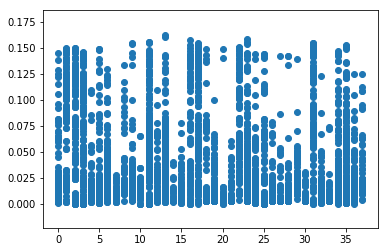

In [13]:
plt.scatter(y_train,X_train['YDBDR-Mean-Block: CH2 1'])
plt.plot()

[]

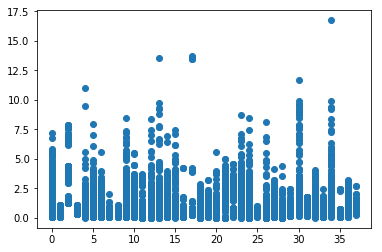

In [14]:
plt.scatter(y_train,X_train['HSV-CH1-50'])
plt.plot()

In [29]:
#logclass = LogisticRegression()
#logclass.fit(X_train,y_train)
#ytrlog_p = logclass.predict(X_train)
#print(accuracy_score(ytrlog_p,y_train))

In [37]:
#X_train = X_train.iloc[:,:-2]
#X_train.head()

,RGB-CH1-1,RGB-CH1-2,RGB-CH1-3,RGB-CH1-4,RGB-CH1-5,RGB-CH1-6,RGB-CH1-7,RGB-CH1-8,RGB-CH1-9,RGB-CH1-10,...,Cluster: 4 cspace: YDBDR; sortY; CH3,Cluster: 4 cspace: YDBDR; sortY; X,Cluster: 4 cspace: YDBDR; sortY; Y,Cluster: 4 cspace: YDBDR; sortY; SIZE,Cluster: 4 cspace: YDBDR; sortSize; CH1,Cluster: 4 cspace: YDBDR; sortSize; CH2,Cluster: 4 cspace: YDBDR; sortSize; CH3,Cluster: 4 cspace: YDBDR; sortSize; X,Cluster: 4 cspace: YDBDR; sortSize; Y,Cluster: 4 cspace: YDBDR; sortSize; SIZE
5829,2.819305,0.020430,0.796760,0.858049,2.226842,1.654809,2.880594,3.697784,15.833052,25.884486,...,0.407996,1.582221,0.284775,0.203931,0.262987,-0.318657,0.161833,0.967257,0.275044,0.377559
3265,3.041214,18.688956,31.459533,38.589351,17.199897,7.584107,4.303129,2.877165,3.205263,2.031683,...,0.163910,0.176944,0.271441,0.196364,0.256073,-0.301116,0.162906,1.067550,0.320088,0.315455
2174,0.449906,5.788786,83.637458,122.179375,22.285326,5.968748,2.879396,1.694645,1.364714,0.749843,...,0.178491,0.955731,0.266372,0.256757,0.297900,-0.355199,0.405743,1.121581,0.324740,0.274365
4746,0.232645,0.286333,2.666475,7.050947,18.289512,51.915728,65.963934,34.968402,14.388227,9.896380,...,0.497821,1.149824,0.069466,0.188370,0.263658,-0.319932,0.157571,0.922796,0.362694,0.493857
7083,11.190287,0.560789,2.803944,11.215777,8.182419,6.092206,2.090213,3.339243,5.149061,2.854925,...,0.379175,0.816993,0.123211,0.070686,0.259087,-0.299148,0.167341,0.440765,0.536763,0.803188


In [15]:
rfclass = RandomForestClassifier(100)
rfclass.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
yrf_p = rfclass.predict(X_train)
print(accuracy_score(yrf_p,y_train))

1.0


In [17]:
X_train.shape

(6329, 4392)

In [18]:
yrf_tp = rfclass.predict(X_test)
print(accuracy_score(yrf_tp,y_test))

0.914087176247631


In [19]:
rfclass.feature_importances_[rfclass.feature_importances_>0.001]

array([0.00143953, 0.00123026, 0.0012846 , 0.00112283, 0.00104845,
       0.00136793, 0.00114535, 0.00104842, 0.00126075, 0.00125817,
       0.00130982, 0.00101152, 0.00185769, 0.00109525, 0.00172205,
       0.00186523, 0.00145931, 0.00153692, 0.00105074, 0.00215415,
       0.00137175, 0.00174413, 0.00108682, 0.00107537, 0.00132041,
       0.00195757, 0.00106282, 0.00131755, 0.00105024, 0.00163857,
       0.00160754, 0.00165332, 0.00171718, 0.002331  , 0.00100419,
       0.00100498, 0.00107287, 0.00135072, 0.00199501, 0.00108182,
       0.00118254, 0.00103744, 0.00106379, 0.00120813, 0.00117836,
       0.0012459 , 0.00108476, 0.0010228 , 0.00176872, 0.00130885,
       0.00178956, 0.00108326, 0.00108092, 0.00139352, 0.00129135,
       0.00116343, 0.00114811, 0.00129242])

In [20]:
forestFeatImpDF = pd.DataFrame(index=X_train.columns[rfclass.feature_importances_>0.001], data=rfclass.feature_importances_[rfclass.feature_importances_>0.001])
forestFeatImpDF.sort_values(by=0,ascending=False)

,0
RGB-Mean-Block: CH3 64,0.002331
RGB-Mean_Sorted-Block: CH1 37,0.002154
HSV-CH2-16,0.001995
RGB-Std_Sorted-Block: CH2 63,0.001958
RGB-Std-Block: CH1 29,0.001865
RGB-CH3-48,0.001858
CIE-CH2-17,0.001790
CIE-CH1-37,0.001769
RGB-Mean_Sorted-Block: CH2 1,0.001744
RGB-Mean-Block: CH1 29,0.001722


In [21]:
y_train

array([ 6, 12, 34, ...,  2, 26, 10], dtype=int8)

In [22]:
X_train.head()

,RGB-CH1-1,RGB-CH1-2,RGB-CH1-3,RGB-CH1-4,RGB-CH1-5,RGB-CH1-6,RGB-CH1-7,RGB-CH1-8,RGB-CH1-9,RGB-CH1-10,...,Cluster: 4 cspace: YDBDR; sortY; CH3,Cluster: 4 cspace: YDBDR; sortY; X,Cluster: 4 cspace: YDBDR; sortY; Y,Cluster: 4 cspace: YDBDR; sortY; SIZE,Cluster: 4 cspace: YDBDR; sortSize; CH1,Cluster: 4 cspace: YDBDR; sortSize; CH2,Cluster: 4 cspace: YDBDR; sortSize; CH3,Cluster: 4 cspace: YDBDR; sortSize; X,Cluster: 4 cspace: YDBDR; sortSize; Y,Cluster: 4 cspace: YDBDR; sortSize; SIZE
5829,2.819305,0.020430,0.796760,0.858049,2.226842,1.654809,2.880594,3.697784,15.833052,25.884486,...,0.407996,1.582221,0.284775,0.203931,0.262987,-0.318657,0.161833,0.967257,0.275044,0.377559
3265,3.041214,18.688956,31.459533,38.589351,17.199897,7.584107,4.303129,2.877165,3.205263,2.031683,...,0.163910,0.176944,0.271441,0.196364,0.256073,-0.301116,0.162906,1.067550,0.320088,0.315455
2174,0.449906,5.788786,83.637458,122.179375,22.285326,5.968748,2.879396,1.694645,1.364714,0.749843,...,0.178491,0.955731,0.266372,0.256757,0.297900,-0.355199,0.405743,1.121581,0.324740,0.274365
4746,0.232645,0.286333,2.666475,7.050947,18.289512,51.915728,65.963934,34.968402,14.388227,9.896380,...,0.497821,1.149824,0.069466,0.188370,0.263658,-0.319932,0.157571,0.922796,0.362694,0.493857
7083,11.190287,0.560789,2.803944,11.215777,8.182419,6.092206,2.090213,3.339243,5.149061,2.854925,...,0.379175,0.816993,0.123211,0.070686,0.259087,-0.299148,0.167341,0.440765,0.536763,0.803188


### Standarization

In [23]:
scaler = StandardScaler()
X_train_transf = pd.DataFrame(data = scaler.fit_transform(X_train), columns = X_train.columns)
X_train_transf.head()

,RGB-CH1-1,RGB-CH1-2,RGB-CH1-3,RGB-CH1-4,RGB-CH1-5,RGB-CH1-6,RGB-CH1-7,RGB-CH1-8,RGB-CH1-9,RGB-CH1-10,...,Cluster: 4 cspace: YDBDR; sortY; CH3,Cluster: 4 cspace: YDBDR; sortY; X,Cluster: 4 cspace: YDBDR; sortY; Y,Cluster: 4 cspace: YDBDR; sortY; SIZE,Cluster: 4 cspace: YDBDR; sortSize; CH1,Cluster: 4 cspace: YDBDR; sortSize; CH2,Cluster: 4 cspace: YDBDR; sortSize; CH3,Cluster: 4 cspace: YDBDR; sortSize; X,Cluster: 4 cspace: YDBDR; sortSize; Y,Cluster: 4 cspace: YDBDR; sortSize; SIZE
0,-0.322625,-0.336911,-0.347122,-0.607471,-0.700480,-0.717383,-0.694182,-0.647411,0.294499,1.299215,...,1.884873,2.628811,-0.448716,-0.615250,-0.017697,-0.164227,-0.316810,1.082951,-0.689996,-0.570130
1,-0.316043,3.753720,2.156525,1.168663,-0.065832,-0.437381,-0.617440,-0.700025,-0.599686,-0.691201,...,-0.408124,-1.299897,-0.501328,-0.716080,-0.209315,0.238516,-0.306304,1.418092,-0.473843,-1.055729
2,-0.392903,0.927046,6.416907,5.103514,0.149719,-0.513664,-0.694246,-0.775842,-0.730017,-0.798165,...,-0.271145,0.877343,-0.521330,0.088593,0.949846,-1.003261,2.071466,1.598642,-0.451522,-1.377007
3,-0.399347,-0.278647,-0.194458,-0.315951,-0.019647,1.656116,2.708990,1.357509,0.192189,-0.034925,...,2.728713,1.419966,-1.298248,-0.822584,0.000884,-0.193514,-0.358546,0.934380,-0.269392,0.339207
4,-0.074336,-0.218508,-0.183233,-0.119900,-0.448047,-0.507834,-0.736820,-0.670398,-0.462044,-0.622505,...,1.614125,0.489477,-1.086189,-2.390597,-0.125798,0.283722,-0.262880,-0.676375,0.565912,2.757866


### Testing models

In [24]:
logclass = LogisticRegression(verbose=1, solver='saga')
logclass.fit(X_train_transf,y_train)

max_iter reached after 27 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 27 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 28 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 27 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 27 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 27 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 27 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 27 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 27 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 27 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 27 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 27 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 26 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 28 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 28 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 29 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 28 seconds


C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed: 16.8min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=1, warm_start=False)

In [25]:
ylog_tp = logclass.predict(X_test)
print(accuracy_score(ylog_tp,y_test))

0.24384080859128238


Logistic Regression's performance is atrocious. This model won't do us any good.

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [27]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_transf,y_train)
yqda_tp = qda.predict(X_test)
print(accuracy_score(yqda_tp,y_test))

C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables a

0.015792798483891344


In [28]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_transf,y_train)
ylda_tp = lda.predict(X_test)
print(accuracy_score(ylda_tp,y_test))

C:\Users\AdamT\Anaconda3\envs\foodmlenv\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.03095388502842704


LDA and QDA classifiers aren't well fit for this problem too.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knc = KNeighborsClassifier()
knc.fit(X_train_transf,y_train)
yknc_tp = knc.predict(X_test)
print(accuracy_score(yknc_tp,y_test))

0.48704990524320907


In [33]:
knc = KNeighborsClassifier(n_neighbors = 7, n_jobs=-1, weights = 'distance')
knc.fit(X_train_transf,y_train)
yknc_tp = knc.predict(X_test)
print(accuracy_score(yknc_tp,y_test))

0.5097915350600126


KNeighborsClassifier works a little bit better

In [32]:
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MultiLabelBinarizer
yb = label_binarize(y, classes = np.unique(y))
n_classes = yb.shape[1]
scaler = StandardScaler()
X_transf = pd.DataFrame(data = scaler.fit_transform(X), columns = X.columns)
X_transf.head()
yc = pd.Categorical(y)
ycat = yc.codes
X_train, X_test, y_train, y_test = train_test_split(X_transf, ycat, test_size = 0.2,
                                                    random_state = 666)#because hail satan
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("======================")
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X train shape:  (6329, 4392)
y train shape:  (6329,)
X test shape:  (1583, 4392)
y test shape:  (1583,)


In [17]:
print(yb[3405,:])

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [27]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
#rfclass = OneVsRestClassifier(RandomForestClassifier(200))
rfclass = OutputCodeClassifier(RandomForestClassifier(200))
rfclass.fit(X_train,y_train)
yrf_tp = rfclass.predict(X_test)
print(accuracy_score(yrf_tp,y_test))

KeyboardInterrupt: 

In [11]:
yrf_tp = rfclass.predict(X_train)
print(accuracy_score(yrf_tp,y_train))

1.0


In [42]:
pipeline = make_pipeline(StandardScaler(),
                          RandomForestClassifier(200))

scs = cross_val_score(pipeline,scale(X_train),y_train,cv=4,verbose=1,n_jobs=-1)
print(scs.mean())
print(scs)

[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:  3.4min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.5min finished


0.5683361977330247
[0.56854075 0.58470291 0.55436157 0.56573957]


### ROC curve for multiclass

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
ovrSVC = OneVsRestClassifier(SVC())
y_sc = ovrSVC.fit(X_train,y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()


In [24]:
from sklearn import datasets
iris = datasets.load_iris()
Xi, yi = iris.data, iris.target
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size = 0.5,
                                                    random_state = 666)#because hail satan

In [25]:
from sklearn.multiclass import OutputCodeClassifier
clf = OutputCodeClassifier(RandomForestClassifier(random_state=0), code_size=2, random_state=0)
clf.fit(Xi_train, yi_train)
yitp = clf.predict(Xi_test)
print(accuracy_score(yitp,yi_test))

0.9733333333333334


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [34]:
pca = PCA(n_components=200, svd_solver='randomized',
          whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [39]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = RandomForestClassifier(200)#GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print(clf.best_estimator_)

AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

In [40]:
y_pred = clf.predict(X_test_pca)

In [76]:
#indxs = np.unique(y_test, return_index=True)[1]
#labs = [y_test.iloc[idx] for idx in sorted(indxs)]
labs = np.unique(y_test)

In [77]:
clt = classification_report(y_test, y_pred, target_names=labs)
print(clt)
#print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

      APPLE       0.63      0.84      0.72       118
    APRICOT       0.78      0.96      0.86        26
  AUBERGINE       0.94      1.00      0.97        46
    AVOCADO       0.86      0.95      0.90        39
     BANANA       0.73      0.56      0.63        43
       BEAN       0.92      1.00      0.96        33
      BREAD       0.96      0.81      0.88        59
        BUN       1.00      0.80      0.89        25
     CARROT       0.95      0.72      0.82        25
     CHEESE       0.96      1.00      0.98        55
   CUCUMBER       0.89      0.92      0.91        37
      DATES       0.92      1.00      0.96        71
   DOUGHNUT       0.75      0.62      0.68        39
        EGG       0.88      0.96      0.91        67
      FIRED       1.00      0.21      0.34        24
      GRAPE       0.90      0.68      0.78        41
 GRAPEFRUIT       0.82      0.82      0.82        22
       KIWI       1.00      0.87      0.93   

In [54]:
type(clt)

str

In [61]:
indxs = np.unique(y_test, return_index=True)[1]
sorted(indxs)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 11,
 12,
 13,
 15,
 17,
 18,
 19,
 21,
 24,
 26,
 30,
 32,
 33,
 34,
 35,
 38,
 40,
 42,
 47,
 58,
 64,
 71,
 72,
 75,
 77,
 83,
 111,
 115,
 194]

In [64]:
y_test.iloc[0]

'SWEET'

In [65]:
indxs = np.unique(y_test, return_index=True)[1]
labs = [y_test.iloc[idx] for idx in sorted(indxs)]

['SWEET',
 'AUBERGINE',
 'PEAR',
 'ORANGE',
 'BEAN',
 'PAPAYA',
 'TOMATO',
 'GRAPE',
 'FIRED',
 'LEMON',
 'PLUM',
 'CUCUMBER',
 'PEPPER',
 'APPLE',
 'BREAD',
 'WATERMELON',
 'DATES',
 'ONION',
 'GRAPEFRUIT',
 'APRICOT',
 'LITCHI',
 'EGG',
 'CARROT',
 'OLIVE',
 'QIWI',
 'PASTA',
 'DOUGHNUT',
 'SACHIMA',
 'AVOCADO',
 'SAUCE',
 'MANGO',
 'MOONCAKE',
 'POMEGRANATE',
 'BUN',
 'CHEESE',
 'KIWI',
 'BANANA',
 'PEACH']

In [79]:
np.set_printoptions(threshold=np.inf)
confData = pd.DataFrame(data = confusion_matrix(y_test, y_pred), index = labs, columns = labs)
#print(confusion_matrix(y_test, y_pred, labels = np.unique(y_test)))
confData

,APPLE,APRICOT,AUBERGINE,AVOCADO,BANANA,BEAN,BREAD,BUN,CARROT,CHEESE,...,PEAR,PEPPER,PLUM,POMEGRANATE,QIWI,SACHIMA,SAUCE,SWEET,TOMATO,WATERMELON
APPLE,99,0,0,0,0,0,0,0,0,0,...,0,1,1,1,3,0,0,0,2,1
APRICOT,0,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
AUBERGINE,0,0,46,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVOCADO,0,0,0,37,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BANANA,7,0,0,0,24,0,1,0,1,0,...,3,0,0,0,0,0,0,0,0,0
BEAN,0,0,0,0,0,33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BREAD,1,0,0,0,1,1,48,0,0,1,...,0,1,0,0,0,0,0,0,0,0
BUN,3,0,0,0,0,0,0,20,0,0,...,1,0,0,0,0,0,0,0,0,0
CARROT,0,0,1,0,0,0,0,0,18,0,...,0,1,0,0,0,0,0,1,0,3
CHEESE,0,0,0,0,0,0,0,0,0,55,...,0,0,0,0,0,0,0,0,0,0


In [74]:
y_test.value_counts()

APPLE          118
ORANGE         106
DATES           71
EGG             67
TOMATO          65
ONION           62
BREAD           59
CHEESE          55
SWEET           55
AUBERGINE       46
PASTA           44
BANANA          43
PLUM            43
SACHIMA         42
SAUCE           42
GRAPE           41
DOUGHNUT        39
AVOCADO         39
KIWI            38
CUCUMBER        37
OLIVE           35
PEAR            34
BEAN            33
LEMON           31
MOONCAKE        29
MANGO           28
PEACH           28
APRICOT         26
CARROT          25
BUN             25
LITCHI          25
POMEGRANATE     24
FIRED           24
PEPPER          23
GRAPEFRUIT      22
PAPAYA          20
QIWI            20
WATERMELON      19
Name: ProdName, dtype: int64